## **Neural Network Regression in TensorFlow**

👁️👁️ Looking to solve Regression Problems

 - Architecture of a neural network regression model
 - Input shapes and output shapes of a regression model (**features** and labels)
 - Creating custom data to view and fit
 - Steps in modelling
  - Creating a model, compiling a model, fitting a model, evaluating a model.
 - Different evaluation methods
 - Saving and loading models

In [1]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


### Creating data to view and fit

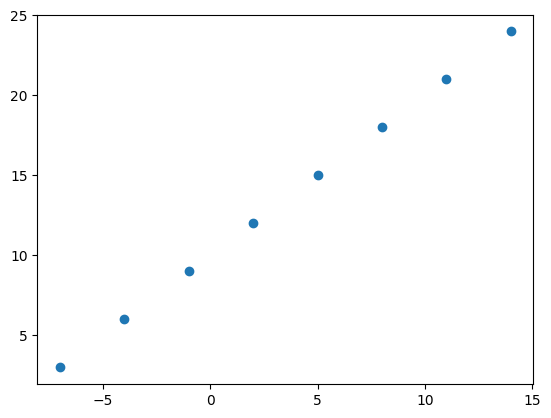

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)


In [3]:
# This is how we get y values from this values (the linear regression of this very simple model)
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [4]:
y == X + 10


array([ True,  True,  True,  True,  True,  True,  True,  True])

#### Input and Output Shapes

In [5]:
# Create a demo tenosr for our housing price prediction problem
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

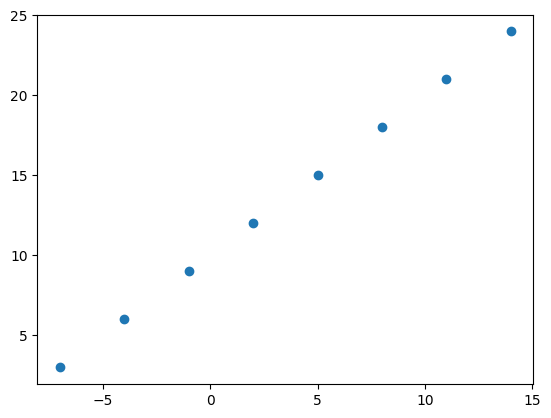

In [10]:
plt.scatter(X, y)


### Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how worng it is), the optimizer (tells our model how to improve the patterns its learning), and the evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features & labels). Epochs - How many times the model will go through all of the training examples
4. **Evaluate the model** on the test data (how reliable are our models predictions?)


In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create amodel using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
]) # into a list method

# add method
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #SGD is short for Stochastic Gradient Descent
              metrics=['mae'])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 951ms/step - loss: 9.9084 - mae: 9.9084
Epoch 2/5
1/1 [==============================] - 0s 18ms/step - loss: 9.7759 - mae: 9.7759
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 9.6434 - mae: 9.6434
Epoch 4/5
1/1 [==============================] - 0s 15ms/step - loss: 9.5109 - mae: 9.5109
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 9.3784 - mae: 9.3784


In [12]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Try and make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 165ms/step


array([[20.47005]], dtype=float32)

### Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization fucntion or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit the model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [14]:
# Rebuilding our model

# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 731ms/step - loss: 17.8537 - mae: 17.8537
Epoch 2/100
1/1 [==============================] - 0s 29ms/step - loss: 17.5725 - mae: 17.5725
Epoch 3/100
1/1 [==============================] - 0s 30ms/step - loss: 17.2912 - mae: 17.2912
Epoch 4/100
1/1 [==============================] - 0s 43ms/step - loss: 17.0100 - mae: 17.0100
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 16.7287 - mae: 16.7287
Epoch 6/100
1/1 [==============================] - 0s 24ms/step - loss: 16.4475 - mae: 16.4475
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 16.1662 - mae: 16.1662
Epoch 8/100
1/1 [==============================] - 0s 39ms/step - loss: 15.8850 - mae: 15.8850
Epoch 9/100
1/1 [==============================] - 0s 27ms/step - loss: 15.6037 - mae: 15.6037
Epoch 10/100
1/1 [==============================] - 0s 25ms/step - loss: 15.3225 - mae: 15.3225
Epoch 11/100
1/1 [==============================

In [15]:
# Remind the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Let's see if the model prediction has improved
model.predict([17.])

1/1 [==============================] - 0s 353ms/step


array([[29.293575]], dtype=float32)

In [22]:
# Rebuilding (third time) our model
# Adding a hidden layer

# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 646ms/step - loss: 12.9911 - mae: 12.9911
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 12.2326 - mae: 12.2326
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 11.5363 - mae: 11.5363
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 10.7901 - mae: 10.7901
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 9.9304 - mae: 9.9304
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 8.8728 - mae: 8.8728
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 7.5279 - mae: 7.5279
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 5.7260 - mae: 5.7260
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 3.9018 - mae: 3.9018
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 4.1225 - mae: 4.1225
Epoch 11/100
1/1 [==============================] - 0s 15ms/

In [24]:
model.predict([17.])

1/1 [==============================] - 0s 43ms/step


array([[29.56271]], dtype=float32)

In [26]:
# Rebuilding our model

# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 629ms/step - loss: 13.1127 - mae: 13.1127
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 12.4096 - mae: 12.4096
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 11.7070 - mae: 11.7070
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 11.0032 - mae: 11.0032
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 10.2960 - mae: 10.2960
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 9.5823 - mae: 9.5823
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 8.8590 - mae: 8.8590
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 8.1228 - mae: 8.1228
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 7.3706 - mae: 7.3706
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 6.7955 - mae: 6.7955
Epoch 11/100
1/1 [==============================] - 0s 10ms/ste

In [27]:
model.predict([25.])

1/1 [==============================] - 0s 135ms/step


array([[34.18231]], dtype=float32)

#### RECAP: Common ways to improve a deep model
- Adding layers
- Increase the number of hideen units
- Change the activation functions
- Change the optimization function
- Change the learning rate (👁️ The most useful hyperparameter to improve our neural network)
- Sampling more data (bigger datasets)
- Fitting training for longer (epochs)

### Evaluating a model